# IMPORT PYTHON LIBRAIES

In [1]:
import pandas as pd
import numpy as np                   #used for numerical calculation
import matplotlib.pyplot as plt      #used for data visualization
%matplotlib inline
from plotnine import *
import seaborn as sns                #plotting graph
import warnings                                      

In [2]:
data = pd.read_csv('marveldata.csv')
data

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


# Data Cleaning 

In [4]:
data.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [5]:
data.nunique()

page_id             16376
name                16376
urlslug             16376
ID                      4
ALIGN                   3
EYE                    24
HAIR                   25
SEX                     4
GSM                     6
ALIVE                   2
APPEARANCES           358
FIRST APPEARANCE      832
Year                   75
dtype: int64

In [6]:
data['APPEARANCES'] = data['APPEARANCES'].fillna(data['APPEARANCES'].mean())

In [7]:
data['ID'] = data['ID'].fillna(data['ID'].mode()[0])
data['ALIGN'] = data['ALIGN'].fillna(data['ALIGN'].mode()[0])
data['EYE'] = data['EYE'].fillna(data['EYE'].mode()[0])
data['HAIR'] = data['HAIR'].fillna(data['HAIR'].mode()[0])
data['SEX'] = data['SEX'].fillna(data['SEX'].mode()[0])
data['GSM'] = data['GSM'].fillna(data['GSM'].mode()[0])
data['ALIVE'] = data['ALIVE'].fillna(data['ALIVE'].mode()[0])
data['FIRST APPEARANCE'] = data['FIRST APPEARANCE'].fillna(data['FIRST APPEARANCE'].mode()[0])
data['Year'] = data['Year'].fillna(data['Year'].mode()[0])

In [8]:
data.isnull().sum()

page_id             0
name                0
urlslug             0
ID                  0
ALIGN               0
EYE                 0
HAIR                0
SEX                 0
GSM                 0
ALIVE               0
APPEARANCES         0
FIRST APPEARANCE    0
Year                0
dtype: int64

In [9]:
df=data.groupby(['SEX']).count()['name']

In [10]:
# marginal
df['Female Characters']/len(data['name'])

0.23430630190522717

In [11]:
data.groupby(['HAIR']).count()['EYE']

HAIR
Auburn Hair                78
Bald                      838
Black Hair               8019
Blond Hair               1582
Blue Hair                  56
Bronze Hair                 1
Brown Hair               2339
Dyed Hair                   1
Gold Hair                   8
Green Hair                117
Grey Hair                 531
Light Brown Hair            6
Magenta Hair                5
No Hair                  1176
Orange Hair                43
Orange-brown Hair           3
Pink Hair                  31
Purple Hair                47
Red Hair                  620
Reddish Blond Hair          6
Silver Hair                16
Strawberry Blond Hair      47
Variable Hair              32
White Hair                754
Yellow Hair                20
Name: EYE, dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                16376 non-null  object 
 4   ALIGN             16376 non-null  object 
 5   EYE               16376 non-null  object 
 6   HAIR              16376 non-null  object 
 7   SEX               16376 non-null  object 
 8   GSM               16376 non-null  object 
 9   ALIVE             16376 non-null  object 
 10  APPEARANCES       16376 non-null  float64
 11  FIRST APPEARANCE  16376 non-null  object 
 12  Year              16376 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


# Data Visualizing

<AxesSubplot:xlabel='ID', ylabel='count'>

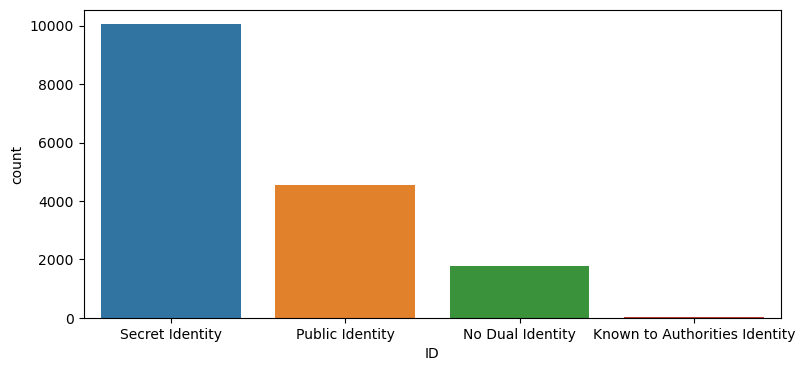

In [13]:
plt.figure(figsize=(9,4))
sns.countplot(x='ID', data=data)

<AxesSubplot:xlabel='ALIGN', ylabel='count'>

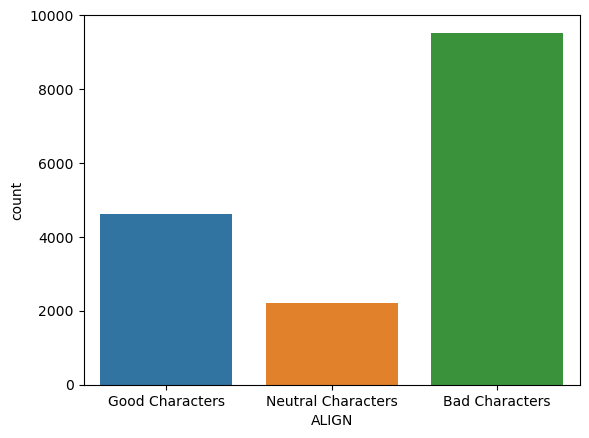

In [14]:
sns.countplot(x='ALIGN', data = data)

<AxesSubplot:xlabel='ALIVE', ylabel='count'>

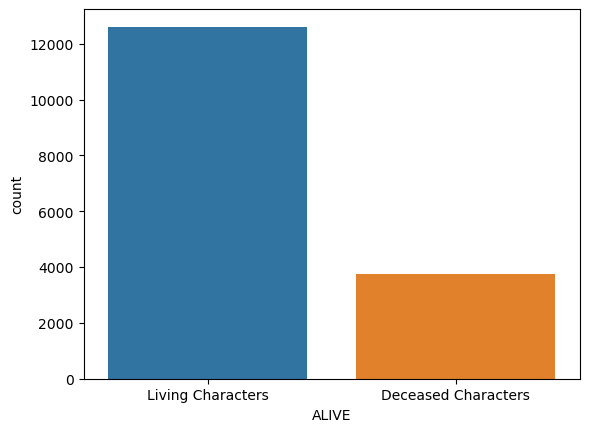

In [15]:
sns.countplot(x='ALIVE', data = data)

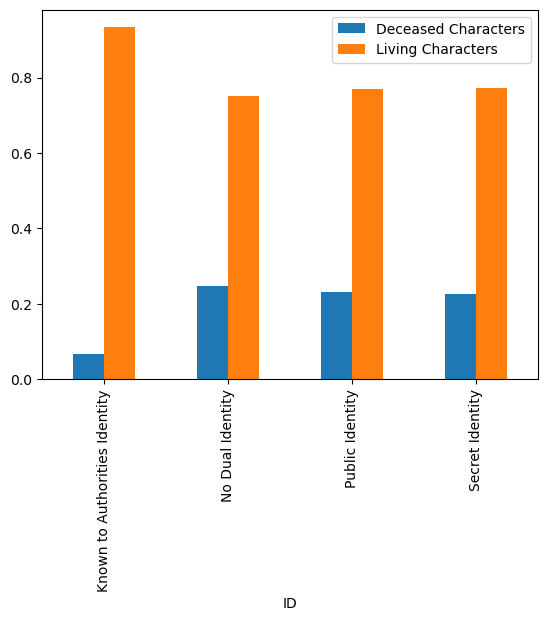

In [16]:
df=pd.crosstab(data['ID'],data['ALIVE'])
df.div(df.sum(1).astype(float),axis=0).plot.bar()
plt.legend()

# Data Preprocessing

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Object= data.select_dtypes(include='object').columns

for feature in Object:
    data[feature] = le.fit_transform(data[feature].astype(str))

print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  int32  
 2   urlslug           16376 non-null  int32  
 3   ID                16376 non-null  int32  
 4   ALIGN             16376 non-null  int32  
 5   EYE               16376 non-null  int32  
 6   HAIR              16376 non-null  int32  
 7   SEX               16376 non-null  int32  
 8   GSM               16376 non-null  int32  
 9   ALIVE             16376 non-null  int32  
 10  APPEARANCES       16376 non-null  float64
 11  FIRST APPEARANCE  16376 non-null  int32  
 12  Year              16376 non-null  float64
dtypes: float64(2), int32(10), int64(1)
memory usage: 1023.6 KB
None


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,13954,13953,3,1,9,6,3,2,1,4043.0,99,1962.0
1,7139,2327,2330,2,1,3,23,3,2,1,3360.0,503,1941.0
2,64786,15996,15999,2,2,3,2,3,2,1,3061.0,738,1974.0
3,1868,6771,6774,2,1,3,2,3,2,1,2961.0,521,1963.0
4,2460,14709,14709,1,1,3,3,3,2,1,2258.0,649,1950.0


In [18]:

data = data.drop(['page_id','name','urlslug'] , axis=1)
data.head()

,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,3,1,9,6,3,2,1,4043.0,99,1962.0
1,2,1,3,23,3,2,1,3360.0,503,1941.0
2,2,2,3,2,3,2,1,3061.0,738,1974.0
3,2,1,3,2,3,2,1,2961.0,521,1963.0
4,1,1,3,3,3,2,1,2258.0,649,1950.0


# ML Model Building

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('ALIVE',axis = 1)
y = data['ALIVE']

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.2 ,random_state =102)

In [20]:
# import logistic regression from scikit learn
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train , y_train)
y_pred = lg.predict(X_test)
acc = accuracy_score(y_test,y_pred)*100
acc

77.13675213675214

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_test,y_pred)*100
acc

76.03785103785103

<AxesSubplot:>

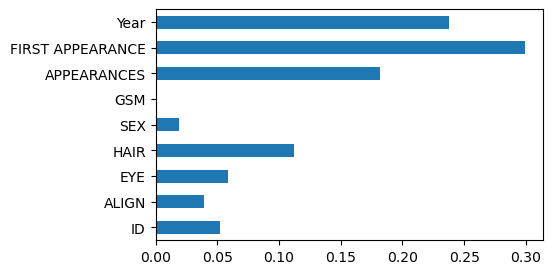

In [22]:
# see the which feature is import which are not using randomforestclassifier
plt.figure(figsize=(5,3))
(pd.Series(rfc.feature_importances_, index=X_train.columns).plot(kind='barh'))

# Conclusion 

     1) In above dataset we saw FIRST APPEARANCE is the most important feature & SEX is low important Feature.
     2) we get 77% accuracy in this model in Logistic Regression ml model & 75% in Random Forest Classifier.
     3) Secret identity is more than other identity.
     4) Bad Character is more than other Character & Most of are Living Character.
     5) Data Quality is good .